In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/ESP3

/content/drive/MyDrive/ESP3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Conv2D,Flatten,MaxPooling2D

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
features=np.load("images_0123456g.npy")
labels=np.load("labels_0123456g.npy")

In [6]:
from keras.utils.np_utils import to_categorical
labels=to_categorical(labels)

In [7]:
features.shape

(35887, 48, 48)

In [8]:
#add dimension to images
features = features.reshape(35887, 48, 48,1)

In [9]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.2,random_state=7)

In [10]:
feature_test.shape

(7178, 48, 48, 1)

In [11]:
def plot_acc_loss(history):
    # Plot accuracy graph
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.ylim([0, 1.0])
    plt.legend(loc='upper left')
    plt.show()

    # Plot loss graph
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    # plt.ylim([0, 3.5])
    plt.legend(loc='upper right')
    plt.show()

In [12]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3), padding="same",input_shape=(48,48,1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3), padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3), padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      512       
 hNormalization)                                                 
                                                        

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(feature_train,label_train,batch_size=64, 
            epochs=30, 
            verbose=1, 
            validation_data=(feature_test,label_test),
            shuffle=True
)

Epoch 1/30
449/449 [==============================] - 24s 32ms/step - loss: 1.6844 - accuracy: 0.3833 - val_loss: 1.5458 - val_accuracy: 0.4033
Epoch 2/30
449/449 [==============================] - 14s 31ms/step - loss: 1.2788 - accuracy: 0.5089 - val_loss: 1.3925 - val_accuracy: 0.4714
Epoch 3/30
449/449 [==============================] - 14s 31ms/step - loss: 1.1537 - accuracy: 0.5640 - val_loss: 1.3145 - val_accuracy: 0.5061
Epoch 4/30
449/449 [==============================] - 14s 31ms/step - loss: 1.0436 - accuracy: 0.6055 - val_loss: 1.3159 - val_accuracy: 0.5043
Epoch 5/30
449/449 [==============================] - 14s 31ms/step - loss: 0.9381 - accuracy: 0.6522 - val_loss: 1.3171 - val_accuracy: 0.5249
Epoch 6/30
449/449 [==============================] - 14s 32ms/step - loss: 0.8118 - accuracy: 0.6986 - val_loss: 1.3057 - val_accuracy: 0.5340
Epoch 7/30
449/449 [==============================] - 14s 31ms/step - loss: 0.6698 - accuracy: 0.7555 - val_loss: 1.3572 - val_accuracy:

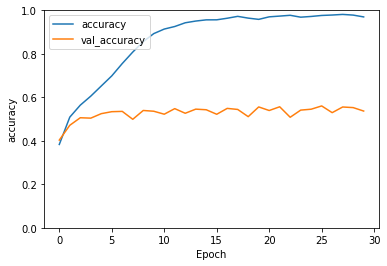

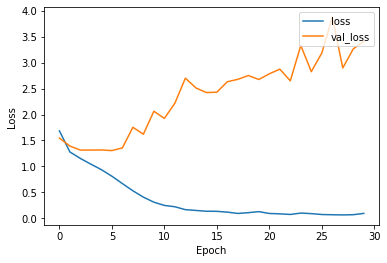

In [15]:
plot_acc_loss(history)

In [ ]:
#JEDNA PROMJENE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
model.save("model_ks17x17")

INFO:tensorflow:Assets written to: model_ks17x17/assets


INFO:tensorflow:Assets written to: model_ks17x17/assets


In [16]:
predictions = model.predict(feature_test)
print(predictions)
predictions1 = np.rint(predictions)
print(predictions1)
print("__________")
print(label_test)

[[6.75843785e-06 1.50427643e-10 2.15504486e-02 ... 1.24218054e-02
  1.35588161e-05 2.53380040e-06]
 [7.17592239e-03 3.71874143e-10 1.31496985e-04 ... 8.61361059e-06
  1.21961637e-06 5.63356552e-05]
 [1.14036359e-01 2.89958942e-12 3.17600816e-01 ... 1.13673914e-05
  5.67406714e-01 2.74984523e-05]
 ...
 [3.62658054e-01 3.41382001e-05 1.68011785e-01 ... 1.37329444e-01
  3.03714420e-04 1.16392961e-02]
 [4.75168321e-03 5.48493910e-18 1.10162682e-05 ... 2.26553084e-06
  6.08356061e-07 6.70899868e-01]
 [9.60557580e-01 1.07336404e-04 3.33523117e-02 ... 5.54977730e-03
  4.60697692e-07 4.32583882e-04]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]
__________
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [17]:
model.evaluate(feature_test,label_test)

225/225 [==============================] - 2s 9ms/step - loss: 3.4084 - accuracy: 0.5369


[3.4083962440490723, 0.5369183421134949]

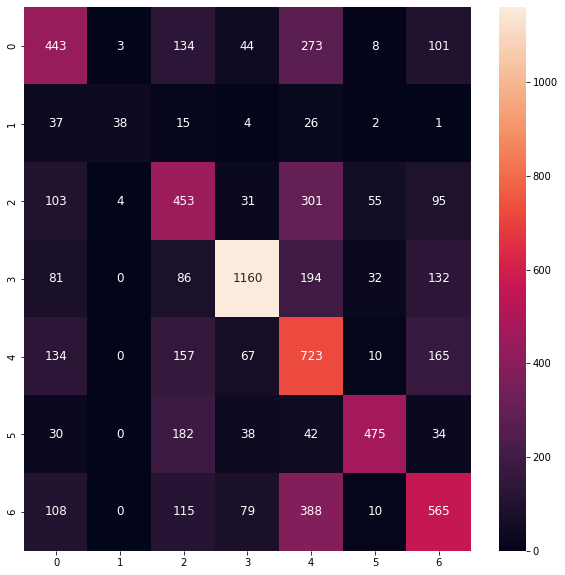

In [20]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

cm = sklearn.metrics.confusion_matrix(label_test.argmax(axis=1), predictions1.argmax(axis=1))
#print(confusion_matrix)
cm = pd.DataFrame(cm, range(7),range(7))
plt.figure(figsize = (10,10))

sns.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 12}) # font size
plt.show()

In [ ]:
#DVIJE PROMJENE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("model_ks17x17") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model_ks17x17.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import tensorflow as tf
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(features).batch(1).take(100):
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
#ja brisao u ispred int8 dvaput
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_model_quant = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpveckek68/assets


INFO:tensorflow:Assets written to: /tmp/tmpveckek68/assets


In [ ]:
#DVIJE PROMJENE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
import pathlib

tflite_models_dir = pathlib.Path("/content/drive/My Drive/ESP4")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

# Save the unquantized/float model:
tflite_model_file = tflite_models_dir/"model_ks17x17.tflite"
tflite_model_file.write_bytes(tflite_model)
# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"model_ks17x17q.tflite"
#tflite_model_quant_file = "mnist_model_quant2.tflite"
tflite_model_quant_file.write_bytes(tflite_model_quant)

11894288